<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Sep8-9/EjercicioSep9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CarPrice_Assignment.csv")
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


## Separando los Tipos de variables


In [25]:
for i in df:
  print(f'*************{ i }*************')
  print(pd.get_dummies(df[i]).columns.values)
  print()

*************car_ID*************
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]

*************symboling*************
[-2 -1  0  1  2  3]

*************CarName*************
['Nissan versa' 'alfa-romero Quadrifoglio'

Empezando a definir las variables de tipo al obtener los valores de la funcion dummies

***Categoricas Binarias***
* fueltype
* aspiration
* doornumber
* enginelocation

***Categoricas nominales***
* wheelbase
* carlenght
* CarName
* carbody
* drivewheel
* enginetype
* fulsystem
* cylindernumber

***Numericas continuas***
* carwidth
* carheight
* boreratio
* stroke
* compressionratio
* price


***Numericas disretas***
* Car_ID
* Symboling
* enginesize
* horsepower
* peakrpm
* citympg
* higwaympg


Correlacion

In [34]:
df.columns.values

array(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

In [36]:
correlacion=df.corr(method='spearman')
correlacion.price

<ipython-input-36-361f9e07fbc4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion=df.corr(method='spearman')


car_ID              0.020485
symboling          -0.144684
wheelbase           0.681773
carlength           0.804316
carwidth            0.811401
carheight           0.242769
curbweight          0.909067
enginesize          0.825996
boreratio           0.643772
stroke              0.111343
compressionratio   -0.173646
horsepower          0.854610
peakrpm            -0.066281
citympg            -0.829479
highwaympg         -0.822729
price               1.000000
Name: price, dtype: float64

<Axes: >

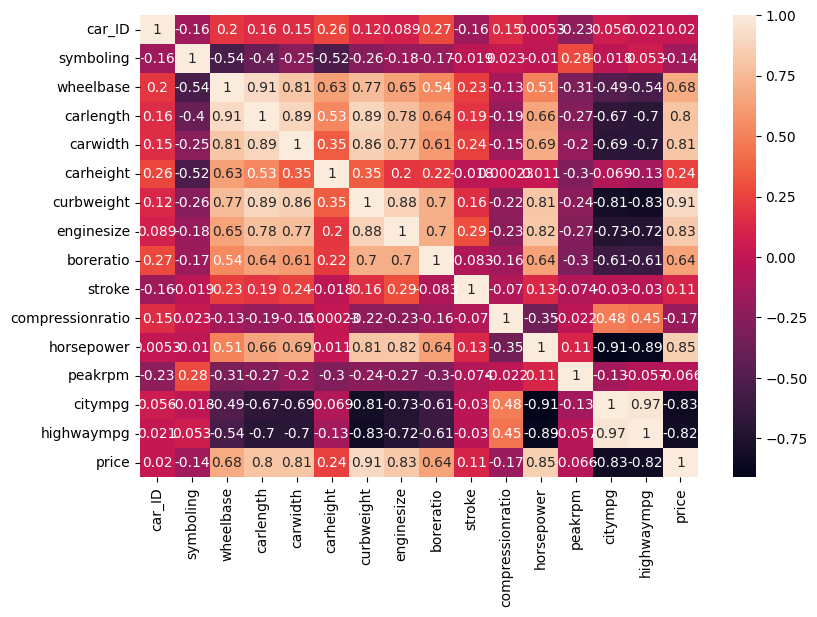

In [43]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(correlacion, annot=True, ax=ax)


#Analiza la dependencia del valor del auto como función de cada variable categorica


In [109]:
#Categoricas Binarias
#'car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration','doornumber', 'carbody', 'drivewheel', 'enginelocation','wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
#'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem','boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm','citympg', 'highwaympg', 'price'
CB=['fueltype','aspiration','doornumber','enginelocation']

cn=['carbody','drivewheel','enginetype','fuelsystem','cylindernumber']
nc=['wheelbase','carlength','carwidth','carheight','boreratio','stroke','compressionratio']
nd=['car_ID','symboling','enginesize','horsepower','peakrpm','citympg','highwaympg']
p=['price']

In [51]:
wheelbase=pd.get_dummies(df['carbody'])
#plt.scatter(fueltype.iloc[:,0],df[p].T)
#plt.xticklabels(fueltype.columns.values)
wheelbase.columns.values

array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
      dtype=object)

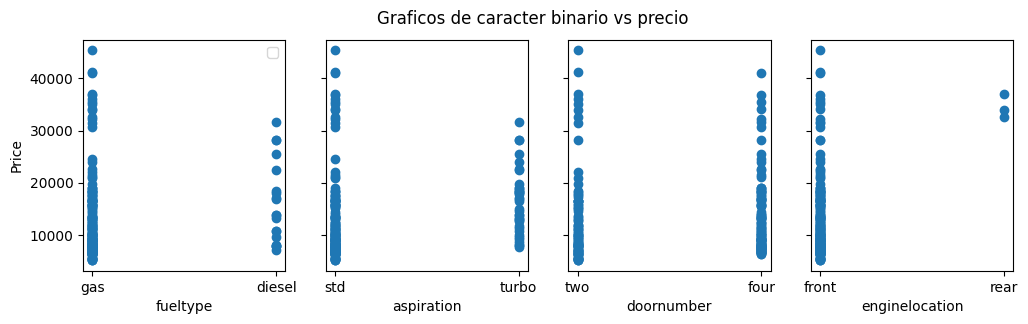

In [99]:
price=np.array(df['price']).T

fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(CB)):
  #temp=pd.get_dummies(df[CB[i]])
  ax[i].scatter(df[CB[i]],price)
  ax[i].set_xlabel(CB[i])
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Graficos de caracter binario vs precio")

plt.show()

In [73]:

6%3

0

IndexError: ignored

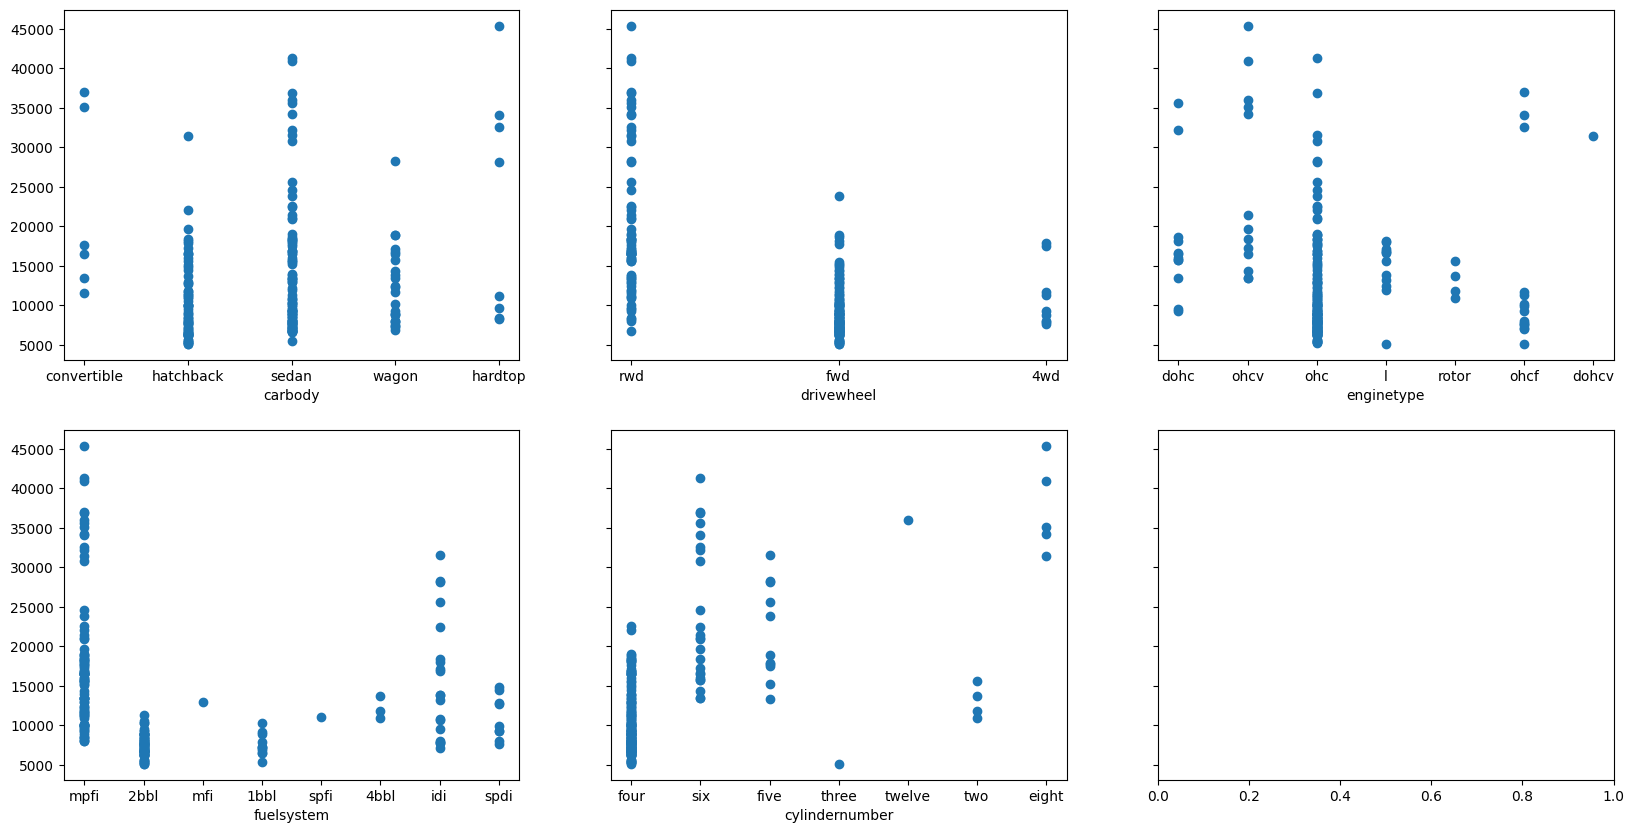

In [111]:
fig,ax=plt.subplots(2,3,figsize=(20, 10),sharey=True)
t=0
for i in range(2):
  for j in range(3):
    ax[i,j].scatter(df[cn[t]],price)
    ax[i,j].set_xlabel(cn[t])
    t += 1
  #ax[i].set_xticklabels(pd.get_dummies(df[cn[i]]).columns.values)
ax[0,0].set_ylabel("Price");
ax[0,0].legend();
plt.show()

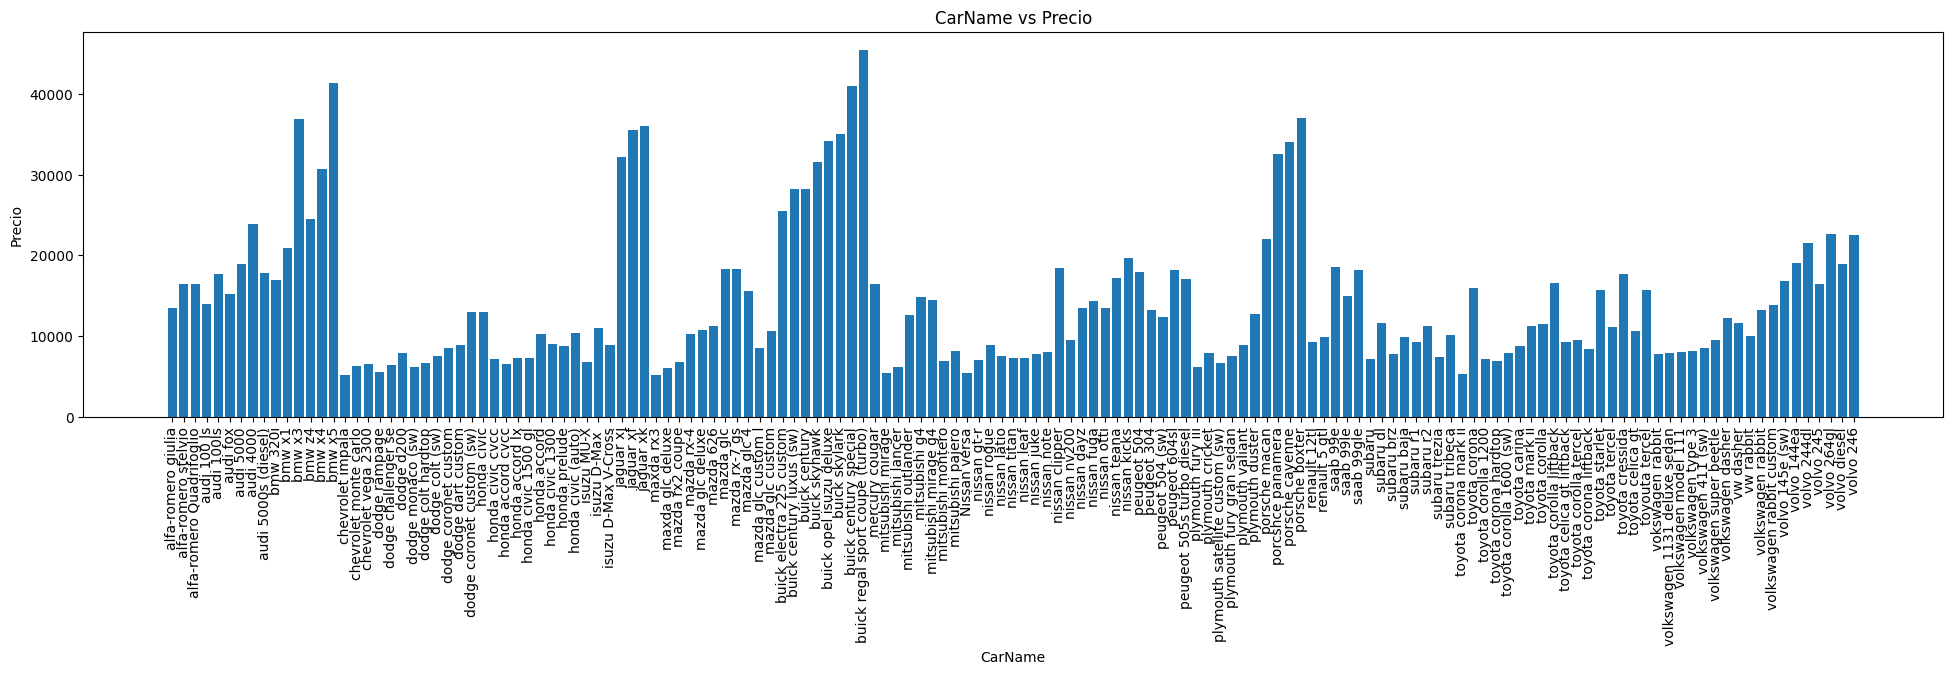

In [94]:
plt.figure(figsize=(24,5))
plt.bar(df['CarName'],df['price'])
plt.xlabel('CarName')
plt.ylabel('Precio')
#plt.xticklabels(pd.get_dummies(df['CarName']).columns.values)#ax[i].set_xticklabels(pd.get_dummies(df[cn[i]]).columns.values)
plt.title('CarName vs Precio')
plt.xticks(rotation=90, fontsize = 10)
plt.show()

<Axes: xlabel='price', ylabel='fuelsystem'>

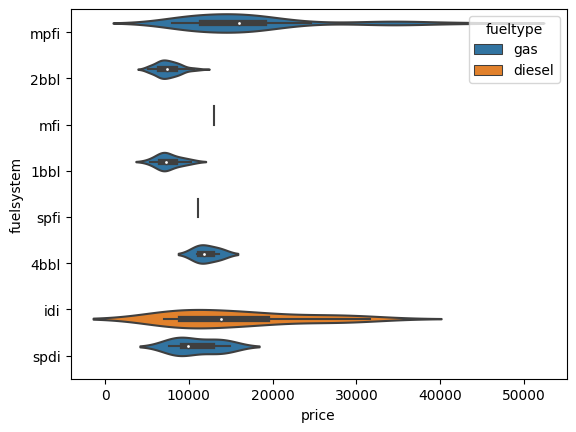

In [33]:
sns.violinplot(data=df, x="price", y="fuelsystem", hue="fueltype")

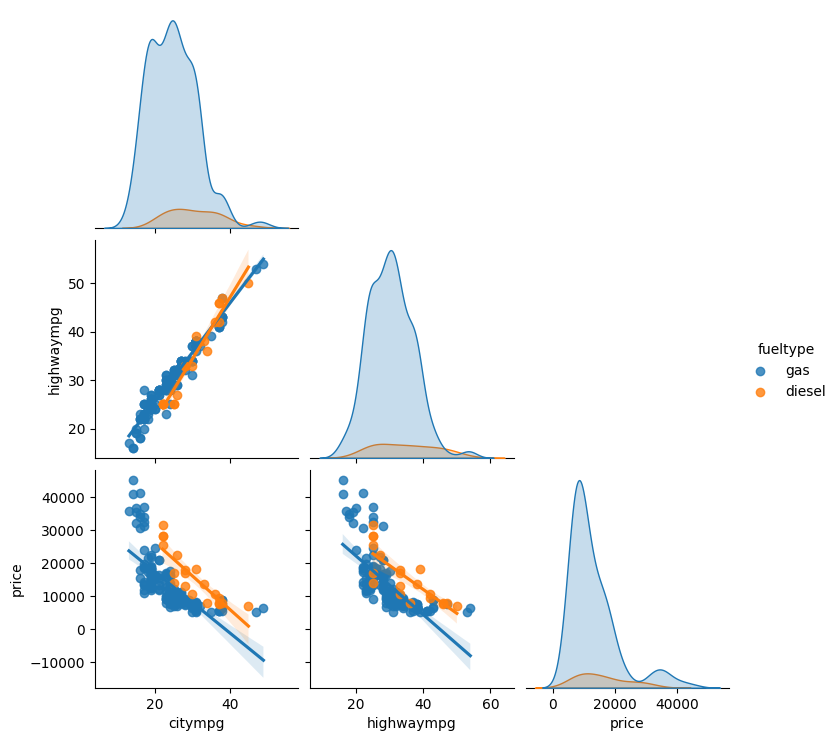

In [42]:
sns.pairplot(df,vars=['citympg','highwaympg']+p,hue ='fueltype', corner = True, kind='reg')

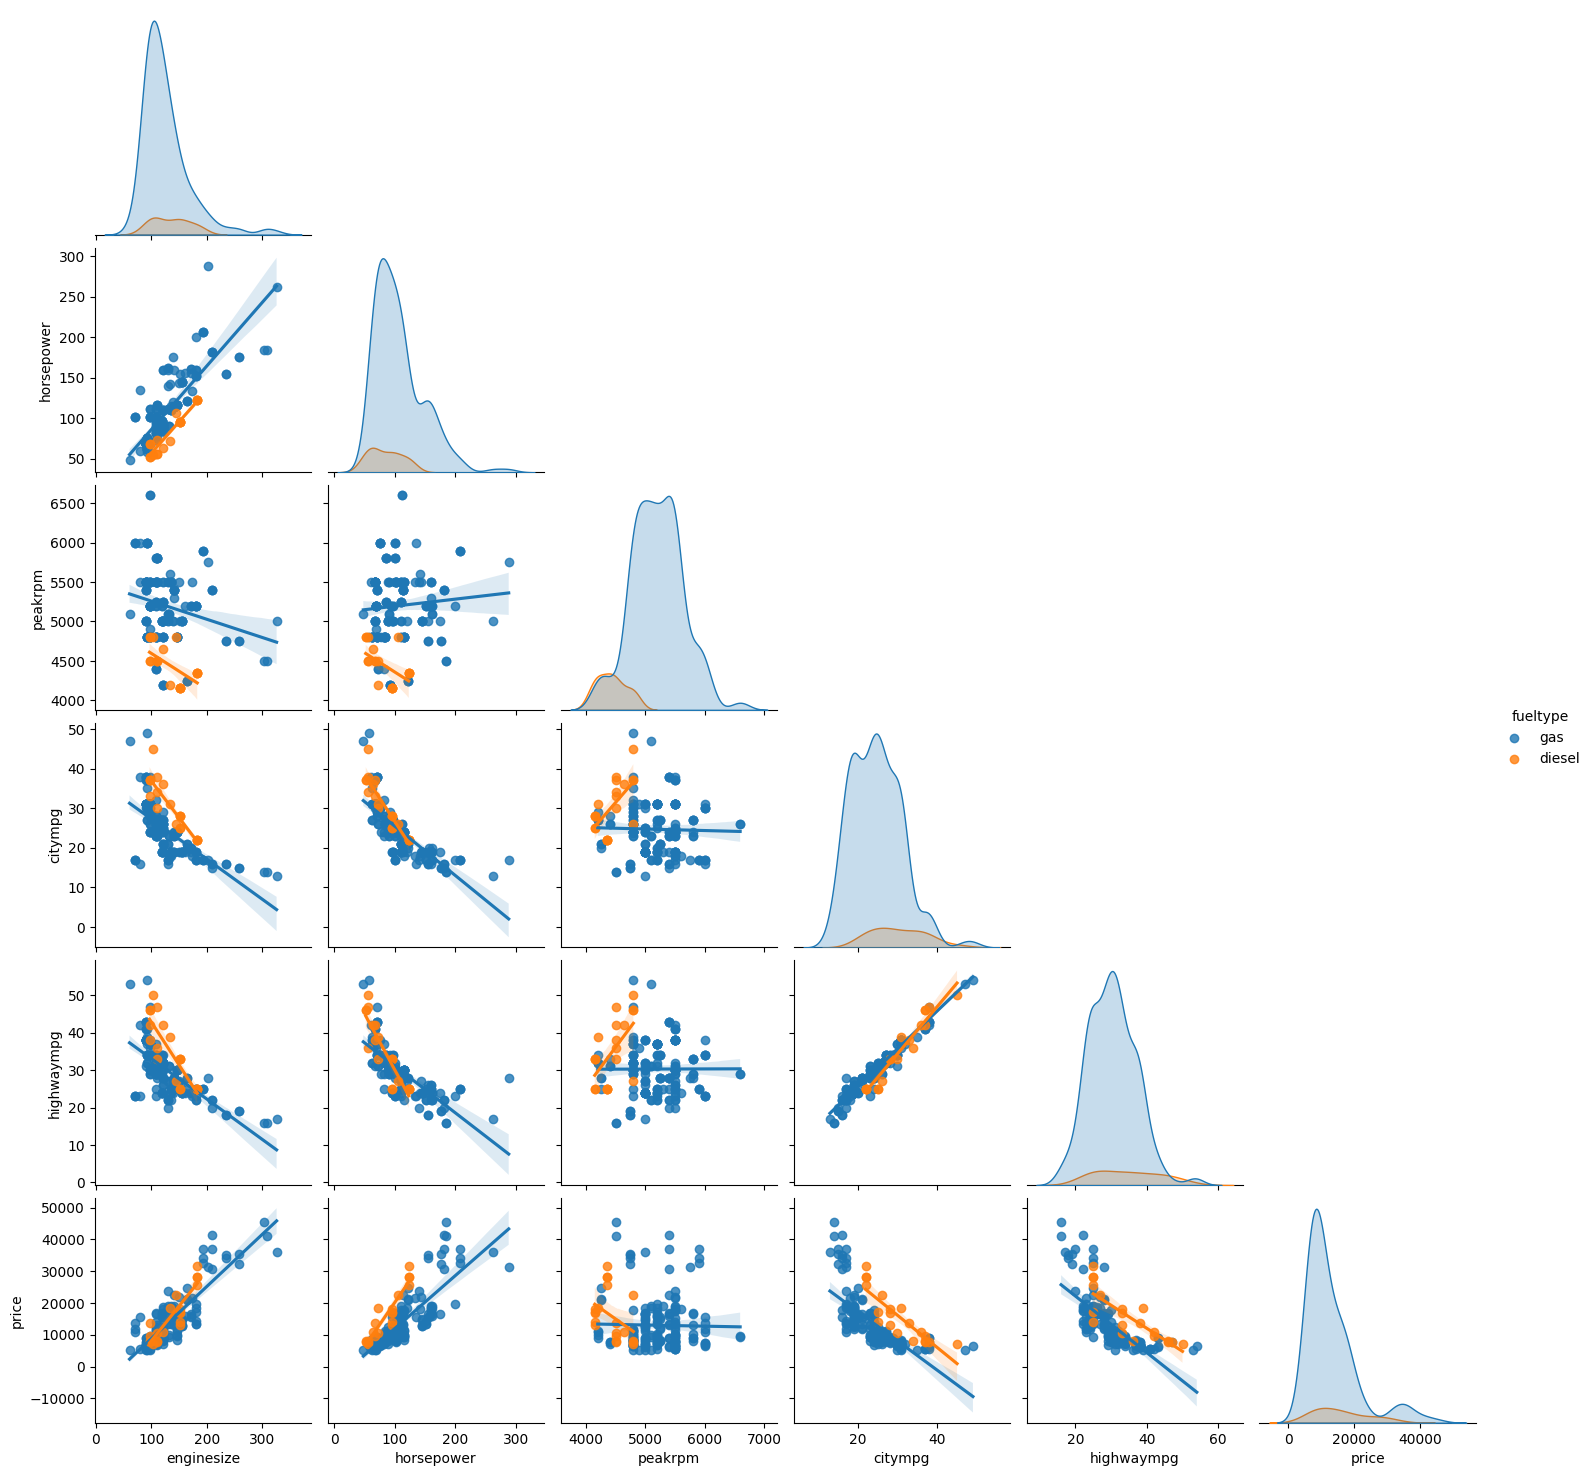

In [21]:
sns.pairplot(df,vars=['enginesize','horsepower','peakrpm','citympg','highwaympg']+p,hue ='fueltype', corner = True, kind='reg')

In [ ]:
sns.violinplot(data=df, x="age", y="class")